# IODA-targeted workflow notebook from mzML

**Purpose**: This notebook generates table with target ions formatted for XCalibur and MaxQuant.Live. It accepts as input one mzTab file from one sample data. The ions detected will be added the target ion list. If you need to generate a mzTab, we recommend using the dedicated [IODA targeted-from-mzML notebook](IODA_targeted_from_mzML.ipynb) using TOPPAS/OpenMS. 

**Documentation**: Please refer to the documentation page for more informations on the TOPPAS/OpenMS for IODA targeted-from-mzTab worklow. [See here](link).

**Instructions**: 
- Provide the mzTab for the sample data to be used. 
- Modify the variables below as needed.

In [1]:
#Automate that in the Binder env
from IODA_targeted_workflow import *
from IODA_run_OpenMS_targeted import *

============================

### Step 1 - Provide the input mzTab file

#### Method 1 (Recommended)
Upload your mzTab with the Jupyter lab interface (left vertical panel: File / Upload icon). The string for the path must be between parenthesis, such as: "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"

#### Method 2
We support downloading the mzTab file from the following cloud sharing services:
- **Google Drive** : obtain the sharing the link (make sure the sharing setting is set to 'Anyone with the link can download').

**Specificy the download link or path for the *input_filename* variable in the cell below**. The string for the link must be between parenthesis, such as: "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"

In [18]:
input_BLANK = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
input_SAMPLE = "https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"
#input_BLANK = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML"
#input_SAMPLE = "tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML"

In [19]:
ppm_error = 10
feature_noise = 5E6
IODA_targeted_workflow(input_BLANK,input_SAMPLE,ppm_error,feature_noise)

[I 200712 00:39:42 IODA_run_OpenMS_targeted:28] 2020-07-12 00:39:42.732479
[I 200712 00:39:42 IODA_run_OpenMS_targeted:35] These are the path to the input files: 
[I 200712 00:39:42 IODA_run_OpenMS_targeted:36] Blank: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML
[I 200712 00:39:42 IODA_run_OpenMS_targeted:37] Blank: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200712 00:39:42 IODA_run_OpenMS_targeted:53] This is the input file path: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_Blank_MS1_2uL.mzML


Starting the IODA-targeted workflow from a mzML file
Getting the mzML, please wait ...


[I 200712 00:39:45 IODA_run_OpenMS_targeted:53] This is the input file path: https://raw.githubusercontent.com/lfnothias/IODA_MS/master/tests/Euphorbia/Targeted/toppas_input/Euphorbia_rogers_latex_latex_MS1_2uL.mzML
[I 200712 00:39:48 IODA_run_OpenMS_targeted:70]    ppm error = 10
[I 200712 00:39:48 IODA_run_OpenMS_targeted:71]    noise threshold = 5000000.0


Changing variables of the OpenMS workflow
Initializing the TOPPAS/OpenMS workflow
Running the TOPPAS/OpenMS workflow, this could take several minutes, please wait ...
Completed the TOPPAS/OpenMS workflow
Zipping up the TOPPAS/OpenMS workflow files
All files zipped successfully!
Completed zipping up the TOPPAS/OpenMS workflow output files
You can continue the rest of the IODA workflow


In [14]:
#input_filename = 'TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Blank_to_Sample_mrgd.mzTab'
#input_filename = 'TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'
#input_filename = 'https://drive.google.com/file/d/1NGVzhrw-xZ4nMJserIQ7v4tYgcmraZ6g/view?usp=sharing'
#input_filename = 'tests/Euphorbia/Targeted/ioda_input/Euphorbia_rogers_latex_Blank_MS1_2uL_to_Euphorbia_rogers_latex_latex_MS1_2uL_mrgd.mzTab'

============================
### Step 2 - Specify the variables for the workflow
**Specify the variables for targeted workflow in the cell below**

*ratio_value*: the minimum ratio for the intensity of an ion between the sample and the blank (sample/blank). Only ions above that ratio will be valid ion targets. (Default = 5).

*min_intensity_value*: the minimum intensity of an ion in the sample (peak height) to be considered as valid ion targets. (Default = 1E5).

*experiment_number*: define the number of iterative experiments to perform for the IODA-targeted workflow. The valid target ions will be splitted into (multiple) experiments (Default = 3, range 1-10)


In [15]:
ratio_value = 5
min_intensity_value = 1E5
experiment_number = 3

============================
### Step 3 - Run the cell below

Beside running the cell below, no action is needed.

In [20]:
make_targeted_list_from_mzTab('OpenMS_generated', experiment_number, ratio_value, min_intensity_value)

[I 200712 00:40:11 IODA_targeted_workflow:277] File generated with the OpenMS workflow
[I 200712 00:40:11 IODA_targeted_workflow:285] 2020-07-12 00:40:11.016858
[I 200712 00:40:11 IODA_targeted_workflow:292]  ==== RUNNING ====
[I 200712 00:40:11 IODA_targeted_workflow:293] Starting the IODA targeted-from-mzTab workflow
[I 200712 00:40:11 IODA_targeted_workflow:295] ======
[I 200712 00:40:11 IODA_targeted_workflow:296] Getting the mzTab
[I 200712 00:40:11 IODA_targeted_workflow:311] This is the input file path: TOPPAS_Workflow/toppas_output/TOPPAS_out/Targeted_MzTab/Blank_to_Sample_mrgd.mzTab
[I 200712 00:40:11 IODA_targeted_workflow:312] This is the output file path: results_targeted/Blank_to_Sample_mrgd.csv
[I 200712 00:40:11 IODA_targeted_workflow:316] ======
[I 200712 00:40:11 IODA_targeted_workflow:317] Converting mzTab to table format
[I 200712 00:40:11 IODA_targeted_workflow:73] - For sample Blank the sum of feature intensities is = 173776840.0
[I 200712 00:40:11 IODA_targeted_wo

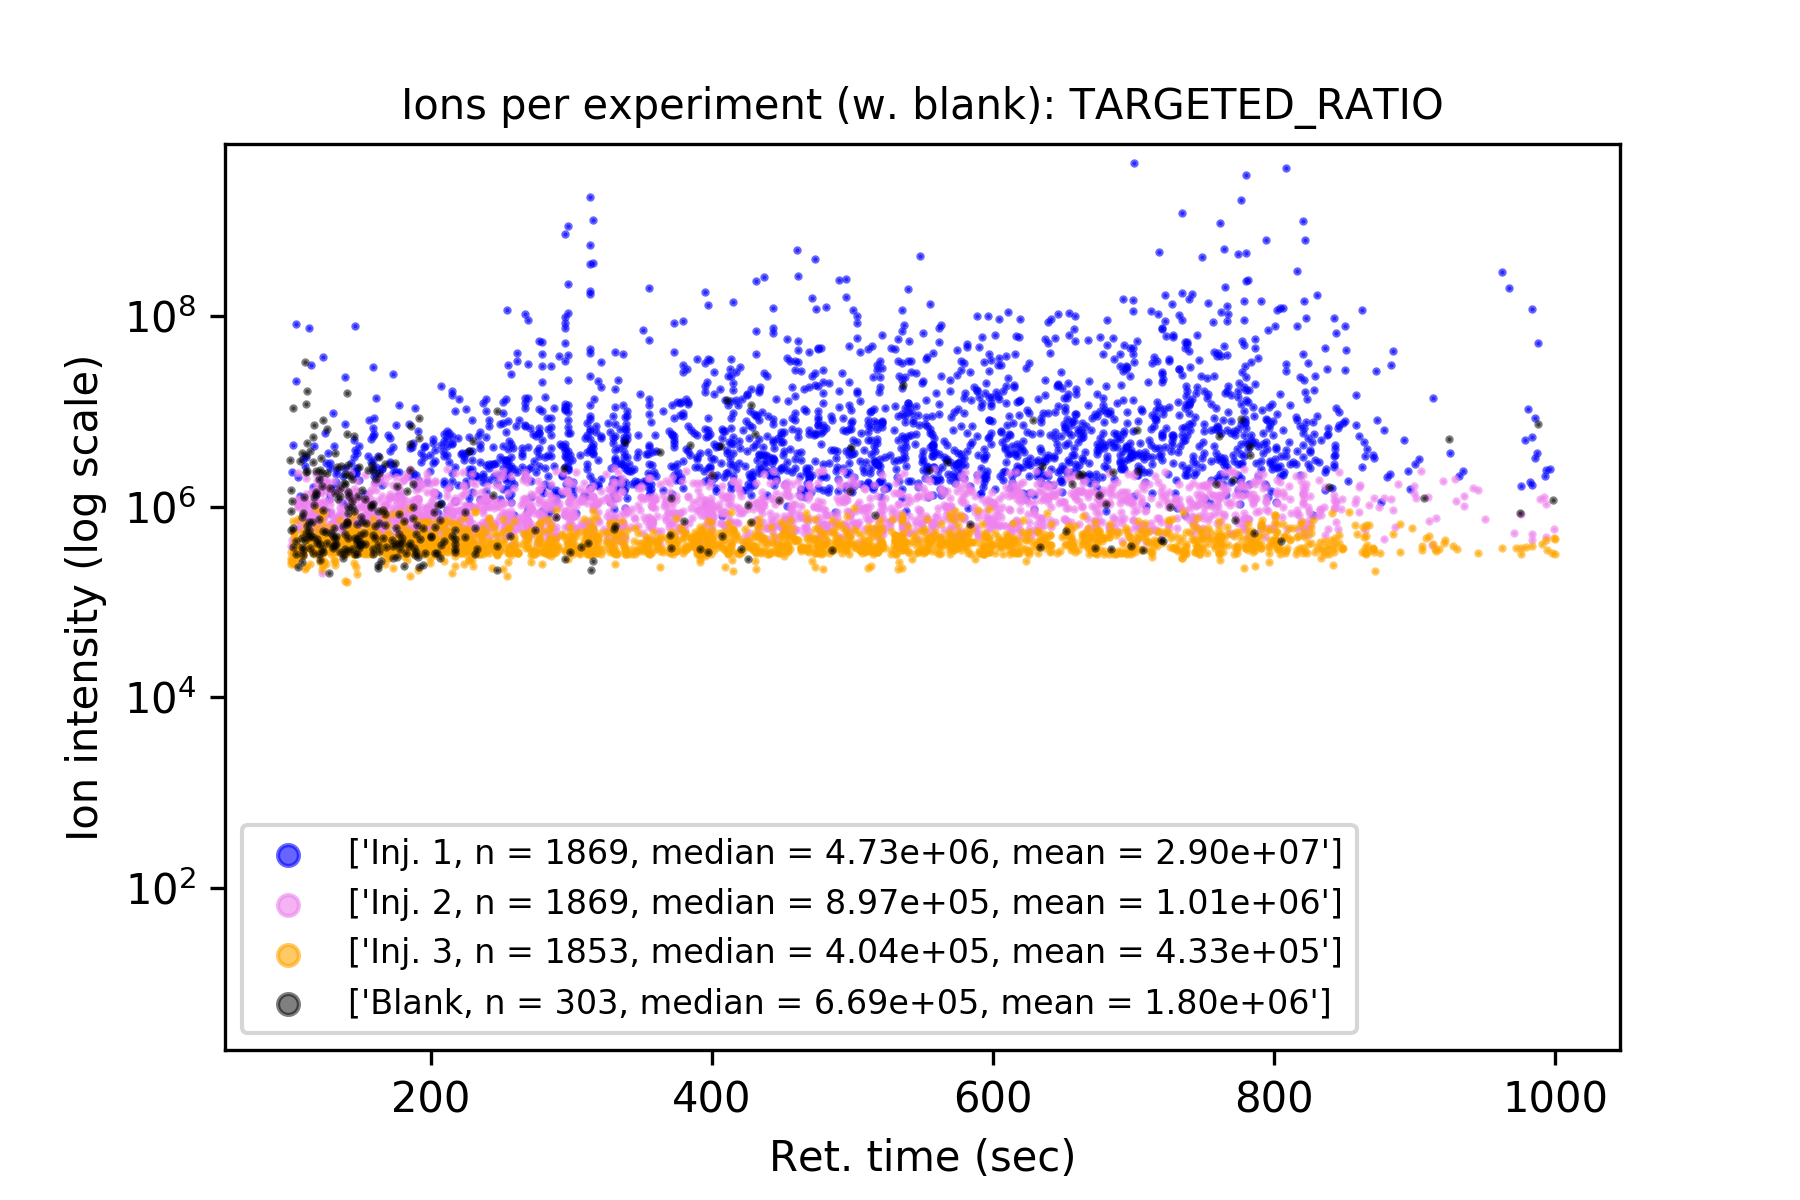

In [17]:
from IPython.display import Image
Image("results_targeted/intermediate_files/injection_blank_shared_TARGETED_RATIO_scatter_view.png")

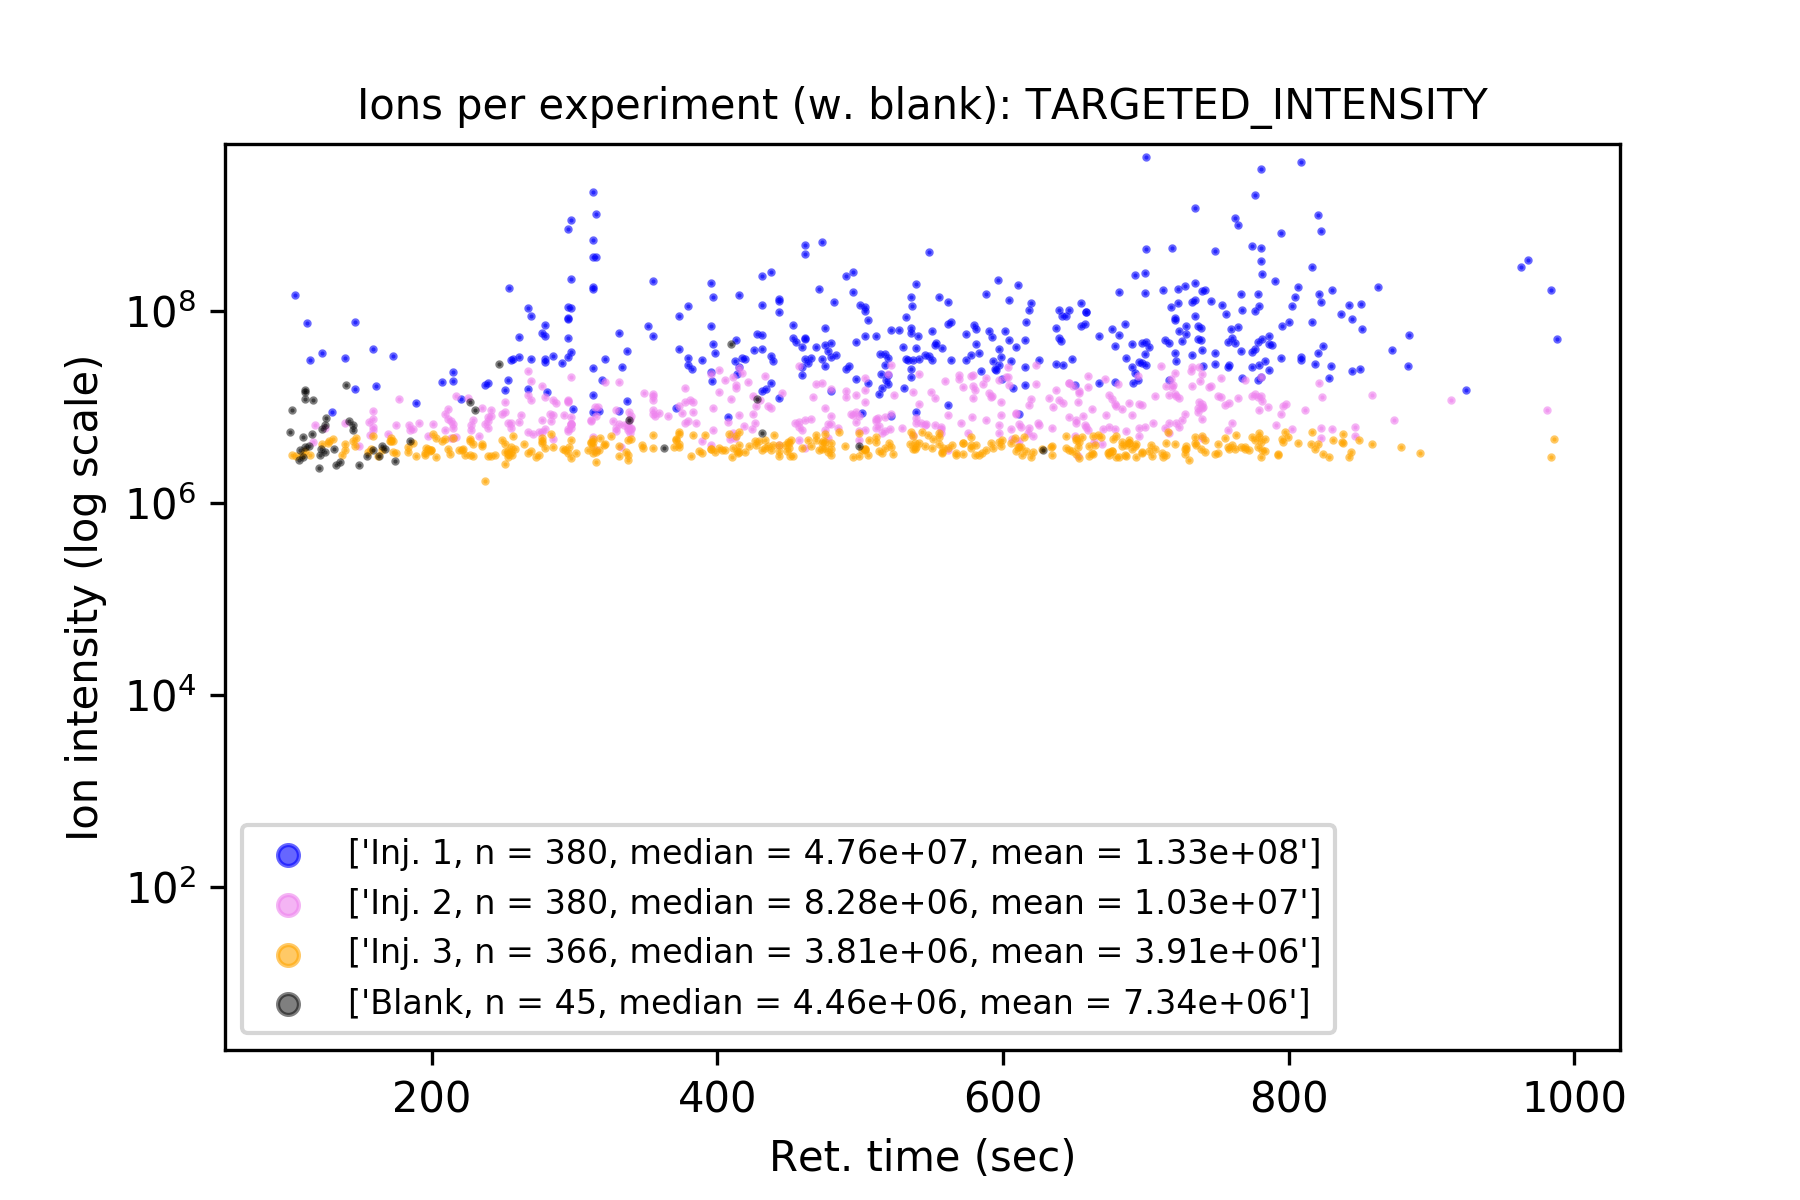

In [7]:
Image("results_targeted/intermediate_files/injection_blank_shared_TARGETED_INTENSITY_scatter_view.png")

============================
### Step 4 - Examine the results

- Examine the IODA-targeted worflow log and the plots in order to verify that the 'min_intensity' parameter is adapted to exclusion level you want to apply, and your sample(s) complexity.
- Note that, at this stage, it cannot be evaluated if ion detection was done optimally. This should be examinated during the generation of the mzTab file (such as with TOPPAS/OpenMS).

### Step 5 - Download the results

Download the result file at
[download-results/IODA_targeted_results.zip](download-results/IODA_targeted_from_mzTab.zip?download=1)

### Step 6 - Prepare your acquisition method
For instructions on how to load and configure an exclusion list with XCalibur or MaxQuant.Live please refer to [the following documentation](nothing).